# 计算物理第六次作业
姓名：王兴未 学号：2018302020138 班级：18级3班

**3.21** Investigate the bifurcation diagrams found for the pendulum with other values of the drive frequency and damping parameter. Warning: This can easily become an ambitious project!

## Problem 3.21

本题是要做不同的驱动力频率及阻尼参数下的bifurcation diagrams，也即在不同的$\Omega_D$及$q$的条件下，做出不同的bifurcation diaframs。

关于物理摆的计算部分，上一次作业的代码可完全复用。而对于作图部分，其步骤如下：

对每一个$F_D$，以驱动力的一个周期为时间间隔对$\theta$函数进行取样（需略过非稳定区），并在图上绘制为($\theta_i$， $F_D$)点。

对每一个$F_D$，大约需要取样100次。这样就使得总时长需大于200个驱动力周期（前100个周期用于排除非稳定区）取最大时间为200个驱动力周期，也即$t_{max} = \frac{400\pi}{\Omega_D}$。

应注意的是，此处应对$\theta$进行调整，以使每一个$theta$值都位于$[-\pi, \pi]$间。

有关数据取$g = 9.8m/s$, $l = 10m$, $m = 10kg$, $dt = \frac{\pi}{200}s$

这里的dt这样取值是为了使每个周期对应的步长

初始条件$\theta_0 = 0.2$, $\omega_0 = 0$

作图范围取$F_D \in [1.35, 1.5]$，作为初始代码的示范图像，我们取初始值$q = 0.5$, $\Omega_D = 2/3$。其他值我们将在后面的讨论部分进行讨论。

In [161]:
import matplotlib.pyplot as plt
import numpy as np

class pendulum(object):
    def __init__(self, F_D, damp_parameter, omega_D, init_theta = 0.2, init_omega = 0, length = 10, mess = 10, time_step = np.pi / 200):
        self.l = length
        self.m = mess
        self.g = 9.8
        self.dt = time_step
        self.F_D = F_D
        self.q = damp_parameter
        self.omega_D = omega_D
        self.theta = [init_theta]
        self.omega = [init_omega]
        self.time = [0]
        self.maxtime = 400 * np.pi / omega_D
        
    def gravity(self):
        return self.g / self.l * np.sin(self.theta[-1])
    def friction(self):
        return self.q * self.omega[-1]
    def drive_force(self):
        return self.F_D * np.sin(self.omega_D * self.time[-1])
        
    def motion(self):
        while(self.time[-1] < self.maxtime):
            self.omega.append(self.omega[-1] + (-self.gravity() - self.friction() + self.drive_force()) * self.dt)
            self.theta.append(self.theta[-1] + self.omega[-1] * self.dt)
            self.time.append(self.time[-1] + self.dt)
            
    def comb(self):
        sample_theta_origin = []
        sample_theta_adjust = []
        sample_theta = []
        number = range(0, len(self.time), 1)
        comb_number = number[len(number) // 2: -1: len(number) // 200]
        for Cp in comb_number:
            sample_theta_origin.append(self.theta[Cp])
        for theta in sample_theta_origin:
            number = int((np.abs(theta) + np.pi) / (2 * np.pi))
            if(theta > 0):
                theta_new = theta - number * 2 * np.pi
            else:
                theta_new = theta + number * 2 * np.pi
            sample_theta.append(theta_new)
        return sample_theta
    
    def comb_linear(self):
        t_start = self.time[len(self.time) // 2]
        realtime_list_index = [len(self.time) // 2]
        real_theta_origin = []
        real_theta = []
        for i in range(99):
            realtime_list_index.append(realtime_list_index[-1] + np.pi * 2 / (self.omega_D * self.dt))
        for i in range(100):
            a = realtime_list_index[i] - int(realtime_list_index[i])
            real_theta_origin.append((1 - a) * self.theta[int(realtime_list_index[i])] + a * self.theta[int(realtime_list_index[i] + 1)])
        for theta in real_theta_origin:
            number = int((np.abs(theta) + np.pi) / (2 * np.pi))
            if(theta > 0):
                theta_new = theta - number * 2 * np.pi
            else:
                theta_new = theta + number * 2 * np.pi
            real_theta.append(theta_new)
        return real_theta
    
    def plot_omega_time(self):
        plt.plot(self.time, self.omega)
        plt.xlabel("time / s")
        plt.ylabel("omega / s^-1")
        plt.title("Omega of system with F_D = {}".format(self.F_D))
        plt.grid()
        plt.show()
    
    def plot_theta_time(self):
        sample_theta = []
        for theta in self.theta:
            number = int((np.abs(theta) + np.pi) / (2 * np.pi))
            if(theta > 0):
                theta_new = theta - number * 2 * np.pi
            else:
                theta_new = theta + number * 2 * np.pi
            sample_theta.append(theta_new)
        plt.plot(self.time, sample_theta)
        plt.xlabel("time / s")
        plt.ylabel("theta / radians")
        plt.title("Theta of system with F_D = {}".format(self.F_D))
        plt.grid()
        plt.show()
        
def bifurcation_diagram(q, omega_D, FD_min = 1.35, FD_max = 1.5):
    for FD in np.arange(FD_min, FD_max, 0.001):
        ball = pendulum(FD, q, omega_D)
        ball.motion()
        sample_theta = ball.comb()
        plt.axis([1.35, 1.5, 0, 3.14])
        FD_array = np.linspace(FD, FD, len(sample_theta))
        plt.plot(FD_array, sample_theta, '.b')
    plt.xlabel("F_D")
    plt.ylabel("theta / radians")
    plt.title("bifurcation diagrams with q = {:.3f} and omega_D = {:.3f}".format(q, omega_D))
    plt.grid()
    plt.show()
    
def bifurcation_diagram_linear(q, omega_D, FD_min = 1.35, FD_max = 1.5, time_step = np.pi / 200, FD_step = 0.001):
    for FD in np.arange(FD_min, FD_max, FD_step):
        ball = pendulum(FD, q, omega_D, time_step = time_step)
        ball.motion()
        sample_theta = ball.comb_linear()
        FD_array = np.linspace(FD, FD, len(sample_theta))
        plt.plot(FD_array, sample_theta, '.b')
    plt.xlabel("F_D")
    plt.ylabel("theta / radians")
    plt.title("bifurcation diagrams with q = {:.3f} and omega_D = {:.3f}".format(q, omega_D))
    plt.grid()
    plt.show()

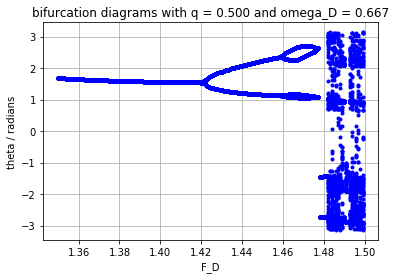

In [133]:
bifurcation_diagram_linear(0.5, 2/3, 1.35, 1.5)

## 讨论

由于画这样一张图需要较长的时间（一张图10min），所以不做过多的讨论。只会改变数值画几个图。

可以注意到的是在混沌区画的图真的是一片混沌，没有书上那种效果。我们猜测这是因为时间精度较低，导致误差相对较大；加之混沌系统的敏感性，使得这些误差被放大了。我们提高精度，计算混沌区的图像来验证我们的猜测。

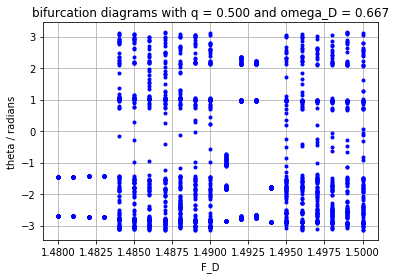

In [135]:
bifurcation_diagram_linear(0.5, 2/3, 1.48, 1.5, time_step = 0.0001)

（作上面的图花了30分钟）

通过图我们发现，乱七八糟的情况并没有改变，这说明出现这种现象与误差无关，而是系统本身具有的特性。

接下来，我们取$q = 0.8, \Omega_D = 1.2$作图 

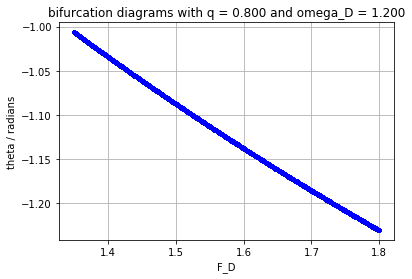

In [143]:
bifurcation_diagram_linear(0.8, 1.2, 1.35, 1.8)

居然画的是一条直线。

我猜可解释如下：q增大后，需要进入混沌区的$F_D$也随之增大。当前的线性区域说明我们取得$F_D$(小于1.8）还不够大。我们取大一点来计算。

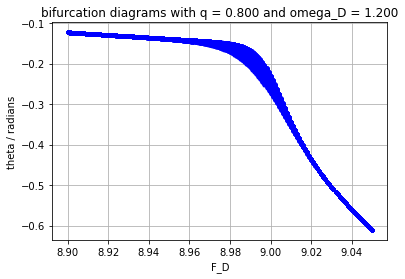

In [148]:
bifurcation_diagram_linear(0.8, 1.2, 8.9, 9.05)

我们发现混沌现象总是不很明显的，说明在这种情况下似乎并不能发生混沌效应。

接下来我们选择小一点的q值，取$q = 0.2, \Omega_D = 1.14$

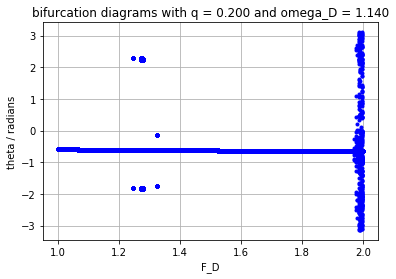

In [150]:
bifurcation_diagram_linear(0.2, 1.14, 1, 2)

在$F_D$接近2时，唐突出现了混沌现象。从大图上来看，这似乎是突然性出现的，我们放大一点来看。

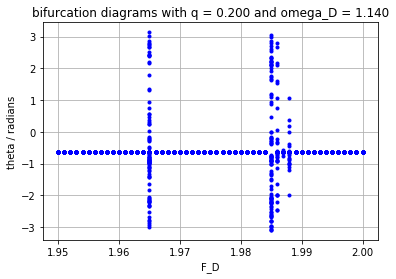

In [151]:
bifurcation_diagram_linear(0.2, 1.14, 1.95, 2)

似乎是只在某几个非常特殊的值上突然出现混沌现象，随后突然消失。此时我作图的$F_D$步长是0.001，如果能更加细致的画图的话理论上应该能发现从周期性转换至混沌性的现象。

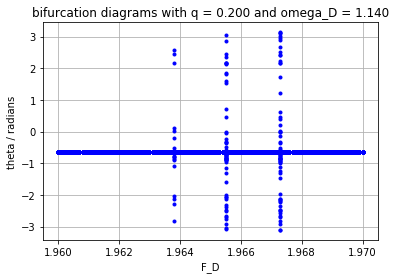

In [162]:
bifurcation_diagram_linear(0.2, 1.14, 1.96, 1.97, FD_step = 0.0001)

绝望.jpg

我们的猜测是不成立的。难不成这还是分形现象？我已经无法得出结论了。

**3.25** Study period-doubling in the Lorentz model by examining the behavior for $r\leq160$. Calculate the bifurcation diagram and extract the value of Feigenbaum's $\delta$ parameter You should find a value similar to that calculated for the pendulum. *Hint:* While this problem can be done using the Euler method, it is probably advisable, in order to conserve computer time, to use the Runge-Kutta algorithm.

## Problem 3.25

Lorenz模型是由如下一组微分方程组构成：
$$\frac{dx}{dt} = \sigma(y-x)$$
$$\frac{dy}{dt} = -xz + rx - y$$
$$\frac{dz}{dx} = xy - bz$$
其中$x,y,z$是变量，而$\sigma, r, b$是常量。

问题需画出该模型的bifurcation_diagram，但在这之前需要知道其在$r=160$时的振动周期，以确定取值的步长。

初始值取$x = 1, y = z = 0 , dt = 0.0001, \sigma = 10, b = 8/3$

In [200]:
class lorenz(object):
    def __init__(self, r, b = 8/3, sigma = 10, x = 1, y = 0, z = 0, timestep = 0.0001, maxtime = 15):
        self.r = r
        self.b = b
        self.sigma = sigma
        self.x = [x]
        self.y = [y]
        self.z = [z]
        self.time = [0]
        self.dt = timestep
        self.maxtime = maxtime
    
    def motion(self):
        while(self.time[-1] < self.maxtime):
            temp_x = self.x[-1]
            temp_y = self.y[-1]
            temp_z = self.z[-1]
            self.x.append(temp_x + self.sigma * (temp_y - temp_x) * self.dt)
            self.y.append(temp_y + (-temp_x * temp_z + self.r * temp_x - temp_y) * self.dt)
            self.z.append(temp_z + (temp_x * temp_y - self.b * temp_z) * self.dt)
            self.time.append(self.time[-1] + self.dt)
    
    def plot_z_time(self):
        plt.plot(self.time, self.z)
        plt.xlabel("time / s")
        plt.ylabel("z")
        plt.title("z versus time with r = {}".format(self.r))
        plt.grid()
        plt.show()
        
    def find_max(self, init_time):
        init_index = int(init_time / self.dt)
        i = init_index
        max_index = []
        while(i < len(self.time) - 1):
            if(self.z[i] > self.z[i - 1] and self.z[i] > self.z[i + 1]):
                max_index.append(i)
            i += 1
        return max_index
    
    def period(self):
        max_index = self.find_max(self.maxtime - 10)
        T = []
        for i in range(len(max_index) - 2):
            T.append(self.time[max_index[i + 2]] - self.time[max_index[i]])
        return np.average(T)
    
    def comb_linear(self):
        period = self.period()
        t_start = self.time[len(self.time) // 2]
        realtime_list_index = [len(self.time) // 2]
        real_z = []
        for i in range(int(self.maxtime / (2 * period)) - 1):
            realtime_list_index.append(realtime_list_index[-1] + period / self.dt)
        for i in range(len(realtime_list_index)):
            a = realtime_list_index[i] - int(realtime_list_index[i])
            real_z.append((1 - a) * self.z[int(realtime_list_index[i])] + a * self.z[int(realtime_list_index[i]) + 1])
        return real_z

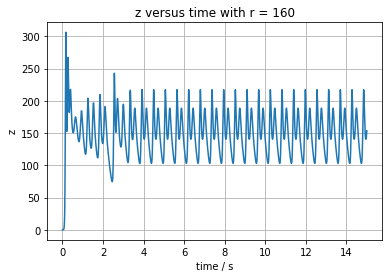

In [159]:
ball = lorenz(160)
ball.motion()
ball.plot_z_time()

对于每一个周期，我们发现有两个极大值。我们可以利用上次作业中找极值的方式来找出这些极大值，随后作差以求得周期。

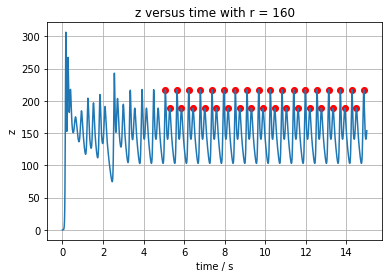

The period is 0.5749242424229025s


In [173]:
ball = lorenz(160)
ball.motion()
max_index = ball.find_max(5)
T = []
for index in max_index:
    plt.plot(ball.time[index], ball.z[index], 'or')
for i in range(len(max_index) - 2):
    T.append(ball.time[max_index[i + 2]] - ball.time[max_index[i]])
ball.plot_z_time()

print('The period is {}s'.format(np.average(np.asarray(T))))

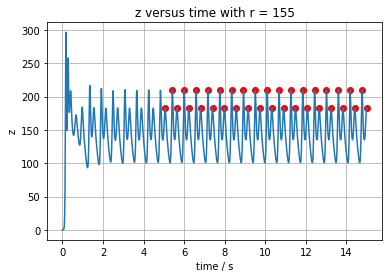

The period is 0.5842787878774262s


In [199]:
ball = lorenz(155)
ball.motion()
max_index = ball.find_max(5)
T = []
for index in max_index:
    plt.plot(ball.time[index], ball.z[index], 'or')
for i in range(len(max_index) - 2):
    T.append(ball.time[max_index[i + 2]] - ball.time[max_index[i]])
ball.plot_z_time()

print('The period is {}s'.format(np.average(np.asarray(T))))

我们发现，对于不同的r值，其周期并不相同。也就是说，我们只能对每一个r值计算一次“周期”（对于混沌情况，这个周期会显得非常奇怪），然后用该周期进行取值，并做z vs r图。

In [201]:
def bifurcation_diagram_linear_L(r_min, r_max = 160, r_step = 0.1):
    for r in np.arange(r_min, r_max, r_step):
        ball = lorenz(r, maxtime = 30)
        ball.motion()
        z_list = ball.comb_linear()
        r_list = np.linspace(r, r, len(z_list))
        plt.plot(r_list, z_list, '.b')
    plt.xlabel("r")
    plt.ylabel("z")
    plt.title('bifurcation_diagram')
    plt.grid()
    plt.show()

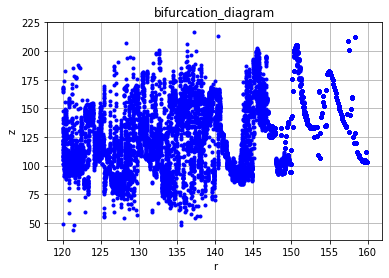

In [203]:
bifurcation_diagram_linear_L(120)

可以看到，在r=150之后这些值都非常的规整，但到了r=150之前就非常的奇怪，也就是说，在r=150之前就进入了混沌状态。

很遗憾的是我们没有观测到周期加倍现象，不知道是什么原因。